In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

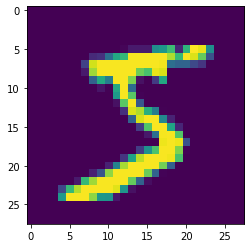

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [11]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [13]:
model.fit(X_train,y_train, epochs=1)

1875/1875 [==============================] - 35s 18ms/step - loss: 0.1544 - accuracy: 0.9534


In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0624 - accuracy: 0.9791


[0.06238183006644249, 0.9790999889373779]

In [15]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [16]:
from sklearn.metrics import classification_report
import numpy as np

In [17]:
y_pred[:5]

array([[1.6308135e-01, 1.2229228e-01, 8.1392652e-01, 9.4838428e-01,
        4.0451458e-01, 8.2113594e-03, 2.7214759e-04, 9.9999893e-01,
        1.5516934e-01, 9.5060182e-01],
       [3.9471102e-01, 9.8502553e-01, 9.9968147e-01, 6.0335112e-01,
        5.2383053e-03, 1.2701249e-02, 8.2006508e-01, 4.7011916e-03,
        2.9537061e-01, 1.2743499e-03],
       [8.1253313e-02, 9.9972725e-01, 2.4718285e-01, 1.1302884e-02,
        6.7883515e-01, 2.5577154e-02, 8.9333847e-02, 6.0033786e-01,
        1.3478687e-01, 1.2820992e-02],
       [9.9995267e-01, 6.6583887e-02, 3.8228551e-01, 3.5465006e-02,
        5.8810990e-02, 1.7536148e-01, 8.6339498e-01, 5.4749060e-01,
        2.6608016e-02, 2.1829577e-01],
       [4.2462215e-01, 1.8061674e-01, 1.0675810e-01, 3.3126447e-02,
        9.9999613e-01, 1.6930832e-03, 1.0697606e-01, 6.8678743e-01,
        2.4068373e-01, 9.6553552e-01]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]

In [21]:
y_classes[:5]

[7, 2, 1, 0, 4]

In [23]:
print(classification_report(y_classes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1005
           1       0.99      0.98      0.99      1150
           2       0.97      0.98      0.97      1015
           3       0.99      0.98      0.98      1020
           4       1.00      0.97      0.98      1013
           5       0.99      0.98      0.98       898
           6       0.98      0.99      0.98       948
           7       0.98      0.98      0.98      1025
           8       0.95      1.00      0.97       927
           9       0.96      0.97      0.97       999

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

